In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
evalData = pd.read_csv('/content/drive/My Drive/DSF project/evalData.csv')
evalData.head(2)

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,ECO,Opening,TimeControl,Termination,Moves
0,Rated Blitz game,https://lichess.org/k1dCrKnw,karat76,hitch22,0-1,2019.09.01,00:00:05,1435,1524,-5,6,NaN,A04,Zukertort Opening: Black Mustang Defense,180+0,Normal,1. Nf3 { [%eval 0.06] [%clk 0:03:00] } 1... Nc...
1,Rated Rapid game,https://lichess.org/PogDfIN1,qrsd,drcharper,1-0,2019.09.01,00:00:03,1550,1508,7,-16,NaN,B30,Sicilian Defense: Old Sicilian,600+0,Normal,1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... c5 ...


In [0]:
evalData['GameType'] = pd.np.where(evalData.Event.str.contains("Blitz"), "Blitz",
            pd.np.where(evalData.Event.str.contains("Bullet"), "Bullet",
                        pd.np.where(evalData.Event.str.contains("Rapid"), "Rapid",
                                    pd.np.where(evalData.Event.str.contains("Classical"), "Classical",
                                                "Correspondence"))))

In [0]:
evalData['EloDifference'] = abs(evalData['WhiteElo'].astype(int) - evalData['BlackElo'].astype(int))

In [0]:
evalData = evalData.sort_values(by='EloDifference', ascending=False)

In [7]:
evalData.head(2)

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,ECO,Opening,TimeControl,Termination,Moves,GameType,EloDifference
1070,Rated Bullet tournament https://lichess.org/to...,https://lichess.org/ZLxVAj4h,PchelkinVK,frapagul24,1-0,2019.09.01,00:34:29,2584,1252,0,0,NaN,D01,"Queen's Pawn Game: Veresov Attack, Boyce Defense",60+0,Normal,1. d4 { [%eval 0.25] [%clk 0:00:30] } 1... d5 ...,Bullet,1332
1470,Rated Rapid game,https://lichess.org/ML0OQlWZ,DEIFI,abdalhaliem,0-1,2019.09.01,00:47:29,878,1981,0,0,NaN,C00,French Defense,300+8,Normal,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...,Rapid,1103


In [8]:
moves = evalData['Moves']
moves.head(2)

1070    1. d4 { [%eval 0.25] [%clk 0:00:30] } 1... d5 ...
1470    1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...
Name: Moves, dtype: object

In [9]:
moves.shape

(6326,)

In [10]:
type(moves)

pandas.core.series.Series

In [0]:
# dataNotNull = evalData[evalData['Moves'].notnull()]
# evals = dataNotNull[dataNotNull['Moves'].str.contains("eval")]
# evals.shape

In [0]:
newEvalData = evalData.copy()

In [0]:
# for i in range(0, len(evalData['Moves'])):    
#     # if 'eval' in evalData['Moves'][i]:
#     splitres = evalData['Moves'][i].split(' } ')
#     whiteEvalSum = 0
#     blackEvalSum = 0
#     for j in range(0, len(splitres)):
#                     if j%2 == 0:
#                         if '%eval ' in splitres[j]:
#                             if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
#                                 whiteEvalSum = whiteEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
#                     else:
#                         if '%eval ' in splitres[j]:
#                             if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
#                                 blackEvalSum = blackEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
#     newEvalData['WhiteTotalEval'][i] = whiteEvalSum
#     newEvalData['BlackTotalEval'][i] = blackEvalSum

In [0]:
data2 = evalData.copy()

In [0]:
data2['WhiteTotalEval'] = ''
data2['BlackTotalEval'] = ''

In [16]:
# create a dataframe
data2['WhiteEvals'] = ''
data2['BlackEvals'] = ''
data2['WhiteEvals'][0] = list()
data2['BlackEvals'][0] = list()
# EvalsForGame1 = pd.Series()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
for i in range(0, len(data2['Moves'])):
    if i%500 == 0:
        print(i)
    # try:
    if data2['Termination'][i]!='Abandoned' and data2['Moves'][i] is not None:
        if 'eval' in data2['Moves'][i]:
            splitres = data2['Moves'][i].split(' } ')
            whiteEvalSum = 0
            blackEvalSum = 0
            WhiteEvalsForGame = list()
            BlackEvalsForGame = list()
            for j in range(0, len(splitres)):
                if j%2 == 0:
                    if '%eval ' in splitres[j]:
                        if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
                            whiteEvalSum = whiteEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
                            WhiteEvalsForGame.append(float(splitres[j].split(']')[0].split('%eval ')[1]))
                            # eval value for this move
                            # append in a list and add a list to data2['WhiteEval'][i]  
                else:
                    if '%eval ' in splitres[j]:
                        if '#' not in splitres[j].split(']')[0].split('%eval ')[1]:
                            blackEvalSum = blackEvalSum + float(splitres[j].split(']')[0].split('%eval ')[1])
                            BlackEvalsForGame.append(float(splitres[j].split(']')[0].split('%eval ')[1]))
            data2['WhiteTotalEval'][i] = whiteEvalSum
            data2['BlackTotalEval'][i] = blackEvalSum
            data2['WhiteEvals'][i] = WhiteEvalsForGame
            data2['BlackEvals'][i] = BlackEvalsForGame
    # except:
    #   print(i)

0
500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be s

1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


In [18]:
listVal = data2['WhiteEvals'][0]
listVal

[0.06,
 -0.24,
 -0.46,
 -0.92,
 -0.03,
 -0.33,
 0.18,
 -0.6,
 -3.1,
 -0.79,
 -0.94,
 -7.41,
 -5.97,
 -6.0]

In [0]:
data2['whiteacpl'] = ''
data2['blackacpl'] = ''

In [20]:
row =1
for i in range(0,len(data2['WhiteEvals'])):
  # print(row)
  listValWhite = data2['WhiteEvals'][i]
  listvalBlack = data2['BlackEvals'][i]
  x = listValWhite[0]
  sum =0
  for j in range(1,len(listValWhite)):
    diff = j-x
    sum = sum + diff
    x = j
  avg = sum/len(listValWhite)
  # print(avg)
  data2['whiteacpl'][i] = avg
  row = row + 1
  x = listvalBlack[0]
  sum =0
  for j in range(1,len(listvalBlack)):
    diff = j-x
    sum = sum + diff
    x = j
  avg = sum/len(listvalBlack)
  # print(avg)
  data2['blackacpl'][i] = avg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
testdf = data2.copy()

In [0]:
testdf.reset_index(inplace = True, drop = True)

In [23]:
testdf.head()

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,ECO,Opening,TimeControl,Termination,Moves,GameType,EloDifference,WhiteTotalEval,BlackTotalEval,WhiteEvals,BlackEvals,whiteacpl,blackacpl
0,Rated Bullet tournament https://lichess.org/to...,https://lichess.org/ZLxVAj4h,PchelkinVK,frapagul24,1-0,2019.09.01,00:34:29,2584,1252,0,0,NaN,D01,"Queen's Pawn Game: Veresov Attack, Boyce Defense",60+0,Normal,1. d4 { [%eval 0.25] [%clk 0:00:30] } 1... d5 ...,Bullet,1332,107.76,81.99,"[0.25, -0.15, -0.26, 0.54, 0.22, -1.35, 3.4, 3...","[0.25, -0.26, 0.71, 0.91, 0.53, 3.25, 3.56, 3....",0.945652,0.9375
1,Rated Rapid game,https://lichess.org/ML0OQlWZ,DEIFI,abdalhaliem,0-1,2019.09.01,00:47:29,878,1981,0,0,NaN,C00,French Defense,300+8,Normal,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...,Rapid,1103,-303.1,-332.3,"[0.24, 0.08, -0.07, -0.69, -0.97, -6.71, -11.8...","[0.3, 0.2, -0.06, -0.6, -0.41, -6.74, -11.89, ...",0.940952,0.940909
2,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/8CHDM5dD,LIGHT_IA,achja,0-1,2019.09.01,00:35:59,1048,2103,0,0,NaN,C00,French Defense: Knight Variation,300+0,Normal,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...,Blitz,1055,-285.35,-260.15,"[0.24, 0.09, 0.15, -0.64, -0.44, -1.05, -0.86,...","[0.3, 0.1, 0.1, -0.4, -0.22, -0.83, -1.06, -1....",0.965556,0.963889
3,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/qdCcIZTm,Alfonsini9,valeriadaniela,1-0,2019.09.01,02:31:13,2046,1065,0,0,NaN,C45,Scotch Game: Classical Variation,180+1,Normal,1. e4 { [%eval 0.24] [%clk 0:01:30] } 1... e5 ...,Blitz,981,18.8,28.8,"[0.24, 0.26, 0.0, 0.0, 0.0, 0.33, 1.53, 1.68, ...","[0.37, 0.15, 0.16, 0.15, 0.33, 1.64, 1.83, 2.0...",0.927059,0.914375
4,Rated Rapid game,https://lichess.org/phON7PdX,MiniHuman,joaocastilho,1-0,2019.09.01,02:31:44,2500,1572,0,0,NaN,B15,Caro-Kann Defense,600+5,Normal,1. d4 { [%eval 0.25] [%clk 0:10:00] } 1... d5 ...,Rapid,928,119.75,131.31,"[0.25, -0.66, 0.13, 0.54, 0.99, 1.41, 1.39, 1....","[0.25, 0.23, 0.56, 0.93, 1.41, 1.37, 2.26, 4.8...",0.940476,0.9375


In [0]:
test = testdf[['whiteacpl', 'blackacpl']].copy()

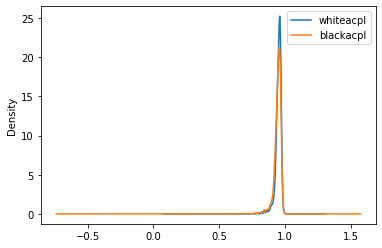

In [25]:


ax = test.plot.kde()


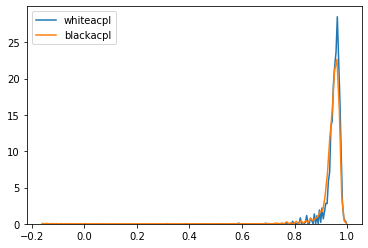

In [26]:
ax = sns.kdeplot(test.whiteacpl, bw=0)
ax = sns.kdeplot(test.blackacpl, bw =0) #shade=True, shade_lowest=False)

In [27]:
data2.head(8)

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,ECO,Opening,TimeControl,Termination,Moves,GameType,EloDifference,WhiteTotalEval,BlackTotalEval,WhiteEvals,BlackEvals,whiteacpl,blackacpl
1070,Rated Bullet tournament https://lichess.org/to...,https://lichess.org/ZLxVAj4h,PchelkinVK,frapagul24,1-0,2019.09.01,00:34:29,2584,1252,0,0,NaN,D01,"Queen's Pawn Game: Veresov Attack, Boyce Defense",60+0,Normal,1. d4 { [%eval 0.25] [%clk 0:00:30] } 1... d5 ...,Bullet,1332,107.76,81.99,"[0.25, -0.15, -0.26, 0.54, 0.22, -1.35, 3.4, 3...","[0.25, -0.26, 0.71, 0.91, 0.53, 3.25, 3.56, 3....",0.945652,0.9375
1470,Rated Rapid game,https://lichess.org/ML0OQlWZ,DEIFI,abdalhaliem,0-1,2019.09.01,00:47:29,878,1981,0,0,NaN,C00,French Defense,300+8,Normal,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...,Rapid,1103,-303.1,-332.3,"[0.24, 0.08, -0.07, -0.69, -0.97, -6.71, -11.8...","[0.3, 0.2, -0.06, -0.6, -0.41, -6.74, -11.89, ...",0.940952,0.940909
1130,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/8CHDM5dD,LIGHT_IA,achja,0-1,2019.09.01,00:35:59,1048,2103,0,0,NaN,C00,French Defense: Knight Variation,300+0,Normal,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...,Blitz,1055,-285.35,-260.15,"[0.24, 0.09, 0.15, -0.64, -0.44, -1.05, -0.86,...","[0.3, 0.1, 0.1, -0.4, -0.22, -0.83, -1.06, -1....",0.965556,0.963889
4471,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/qdCcIZTm,Alfonsini9,valeriadaniela,1-0,2019.09.01,02:31:13,2046,1065,0,0,NaN,C45,Scotch Game: Classical Variation,180+1,Normal,1. e4 { [%eval 0.24] [%clk 0:01:30] } 1... e5 ...,Blitz,981,18.8,28.8,"[0.24, 0.26, 0.0, 0.0, 0.0, 0.33, 1.53, 1.68, ...","[0.37, 0.15, 0.16, 0.15, 0.33, 1.64, 1.83, 2.0...",0.927059,0.914375
4479,Rated Rapid game,https://lichess.org/phON7PdX,MiniHuman,joaocastilho,1-0,2019.09.01,02:31:44,2500,1572,0,0,NaN,B15,Caro-Kann Defense,600+5,Normal,1. d4 { [%eval 0.25] [%clk 0:10:00] } 1... d5 ...,Rapid,928,119.75,131.31,"[0.25, -0.66, 0.13, 0.54, 0.99, 1.41, 1.39, 1....","[0.25, 0.23, 0.56, 0.93, 1.41, 1.37, 2.26, 4.8...",0.940476,0.9375
809,Rated Bullet tournament https://lichess.org/to...,https://lichess.org/xI6DaQD4,OtraSugerencia,Vijeth,1-0,2019.09.01,00:25:40,2297,1392,1,0,NaN,A40,"Englund Gambit Declined, Reversed French",60+0,Time forfeit,1. e3 { [%eval -0.03] [%clk 0:00:30] } 1... e5...,Bullet,905,33.73,26.3,"[-0.03, 0.12, 0.28, 0.14, 0.02, 0.21, -0.27, -...","[0.25, 0.12, 0.14, 0.07, 0.25, 0.57, 0.12, 0.2...",0.967667,0.953704
4003,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/SAmQpk4T,tupapaenajedrez,MiquelAngelus21,1-0,2019.09.01,02:16:05,2058,1210,0,-1,NaN,A41,Queen's Pawn,180+0,Time forfeit,1. d4 { [%eval 0.25] [%clk 0:01:30] } 1... d6 ...,Blitz,848,374.7,316.43,"[0.25, 0.57, 0.51, 0.72, 0.99, 1.16, 0.84, 3.6...","[0.47, 0.34, 0.6, 0.88, 1.11, 1.27, 3.65, 3.51...",0.966216,0.958
1520,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/NvFHWjXG,MarielsonO,fischerev7,0-1,2019.09.01,00:49:21,1267,2112,0,0,NaN,A46,Indian Game: Spielmann-Indian,300+0,Normal,1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... Nf6...,Blitz,845,-84.7,-81.03,"[0.25, 0.11, 0.17, -0.2, -0.18, -0.64, -0.94, ...","[0.22, 0.24, 0.0, 0.0, -0.29, -0.33, -0.8, -0....",0.926471,0.928235


In [28]:
len(data2['WhiteEvals'][0])

14

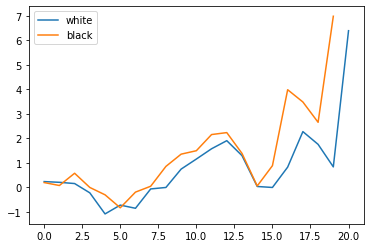

Rated Rapid game
1550
1508
1-0


In [29]:
s = pd.Series(data2['WhiteEvals'][1]) 
t = pd.Series(data2['BlackEvals'][1]) 
plt.plot(s.index, s.values, label= 'white')
plt.plot(t.index, t.values, label= 'black')
plt.legend()
plt.show()
print(data2['Event'][1])
print(data2['WhiteElo'][1])
print(data2['BlackElo'][1])
print(data2['Result'][1])

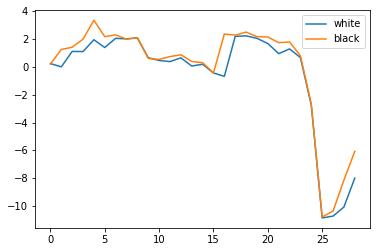

Rated Blitz game
1233
1307
0-1


In [30]:
s = pd.Series(data2['WhiteEvals'][7]) 
t = pd.Series(data2['BlackEvals'][7]) 
plt.plot(s.index, s.values, label= 'white')
plt.plot(t.index, t.values, label= 'black')
plt.legend()
plt.show()
print(data2['Event'][7])
print(data2['WhiteElo'][7])
print(data2['BlackElo'][7])
print(data2['Result'][7])

In [0]:
# s = pd.Series(data2['WhiteEvals'][1]) 
# t = pd.Series(data2['BlackEvals'][1]) 
# fig = plt.figure()
# ax = plt.subplot(111)
# plt.plot(s.index, s.values, label= 'white')
# plt.plot(t.index, t.values, label= 'black')
# plt.title('Legend inside')
# # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),&nbsp; shadow=True, ncol=2)
# plt.show()

Blitz - top players

In [32]:
# white win = 1, black win = 0, draw = 2
a = (data2['Result'])
for i in range(0,a.shape[0]):
    if(a[i]=='1/2-1/2'):
        a[i]=2
    elif(a[i]=='0-1' ):
        a[i]=0
    else:
        a[i]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
data2['ResultCoded'] = a

In [34]:
data2.head(2)
# data2.shape

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,WhiteTitle,ECO,Opening,TimeControl,Termination,Moves,GameType,EloDifference,WhiteTotalEval,BlackTotalEval,WhiteEvals,BlackEvals,whiteacpl,blackacpl,ResultCoded
1070,Rated Bullet tournament https://lichess.org/to...,https://lichess.org/ZLxVAj4h,PchelkinVK,frapagul24,1,2019.09.01,00:34:29,2584,1252,0,0,NaN,D01,"Queen's Pawn Game: Veresov Attack, Boyce Defense",60+0,Normal,1. d4 { [%eval 0.25] [%clk 0:00:30] } 1... d5 ...,Bullet,1332,107.76,81.99,"[0.25, -0.15, -0.26, 0.54, 0.22, -1.35, 3.4, 3...","[0.25, -0.26, 0.71, 0.91, 0.53, 3.25, 3.56, 3....",0.945652,0.9375,1
1470,Rated Rapid game,https://lichess.org/ML0OQlWZ,DEIFI,abdalhaliem,0,2019.09.01,00:47:29,878,1981,0,0,NaN,C00,French Defense,300+8,Normal,1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...,Rapid,1103,-303.1,-332.3,"[0.24, 0.08, -0.07, -0.69, -0.97, -6.71, -11.8...","[0.3, 0.2, -0.06, -0.6, -0.41, -6.74, -11.89, ...",0.940952,0.940909,0


In [35]:
sctPlot = pd.DataFrame(columns=['ELO', 'MoveEval', 'level'])
sctPlot.head()

,ELO,MoveEval,level


In [36]:
cnt = 0
level = 0
for i in data2['BlackEvals']:
    # if cnt > 1000:
    #   break 
    movelist = i
    for j in movelist:
        
        if data2['BlackElo'][cnt] <= 1300:
            level = 'Beginer'
        elif data2['BlackElo'][cnt] > 1300 and data2['BlackElo'][cnt] < 2000:
            level = 'Intermediate'
        elif data2['BlackElo'][cnt] >= 2000:
            level = 'Master'

        if data2['ResultCoded'][cnt] == 0:
            if level == 'Master' and j > 52:
                continue
            if level == 'Intermediate' and j > 53 and data2['BlackElo'][cnt] > 1600:
                continue
            if level == 'Intermediate' and j > 60 and data2['BlackElo'][cnt] < 1600:
                continue
            if level == 'Beginer' and j < -50 and data2['BlackElo'][cnt] < 1000:
                continue
            if level == 'Beginer' and j < -70 and data2['BlackElo'][cnt] < 1500:
                continue
            sctPlot = sctPlot.append({'ELO': data2['BlackElo'][cnt], 'MoveEval': j, 'level': level}, ignore_index=True)
    cnt = cnt + 1

KeyboardInterrupt: ignored

In [0]:
sctPlot.head()

In [0]:
sns.scatterplot(x="MoveEval", y="ELO", hue="level", data=sctPlot)

In [0]:
# colors = ("red", "green", "blue")
groups = (0, 1, 2)
plt.scatter(sctPlot['MoveEval'], sctPlot['ELO'],alpha=0.5)
plt.title('Eval pattern of black wins')
plt.xlabel('MoveEval')
plt.ylabel('ELO')
plt.show()

In [0]:
sctPlotW = pd.DataFrame(columns=['ELO', 'MoveEval', 'level'])
sctPlotW.head()

In [0]:
cnt = 0
level = 0
for i in data2['WhiteEvals']:
    cnt = cnt + 1
    # if cnt > 100:
    #   break 
    movelist = i
    for j in movelist:
        
        if data2['WhiteElo'][cnt] <= 1300:
            level = 'Beginer'
        elif data2['WhiteElo'][cnt] > 1300 and data2['WhiteElo'][cnt] < 2000:
            level = 'Intermediate'
        elif data2['WhiteElo'][cnt] >= 2000:
            level = 'Master'

        if data2['ResultCoded'][cnt] == 1:
            if level == 'Beginer' and j > 52:
                continue
            if level == 'Intermediate' and j > 53 and data2['BlackElo'][cnt] > 1600:
                continue
            if level == 'Intermediate' and j > 60 and data2['BlackElo'][cnt] < 1600:
                continue
            if level == 'Master' and j < -50 and data2['BlackElo'][cnt] < 2250:
                continue
            if level == 'Master' and j < -70 and data2['BlackElo'][cnt] < 2500:
                continue
            sctPlotW = sctPlotW.append({'ELO': data2['WhiteElo'][cnt], 'MoveEval': j, 'level': level}, ignore_index=True)

In [0]:
sns.scatterplot(x="MoveEval", y="ELO", hue="level", data=sctPlotW)

In [0]:
upsetData = data2[['ResultCoded', 'WhiteElo', 'BlackElo']]


In [0]:

upsetData.reset_index(inplace = True, drop = True)

In [55]:
upsetData.head(30)

,ResultCoded,WhiteElo,BlackElo
0,1,2584,1252
1,0,878,1981
2,0,1048,2103
3,1,2046,1065
4,1,2500,1572
5,1,2297,1392
6,1,2058,1210
7,0,1267,2112
8,0,1126,1962
9,1,1621,796


In [65]:
upsetData['ResultCoded'][6]

1

In [0]:
upsetFilter=pd.DataFrame(columns=['ResultCoded', 'BlackElo', 'WhiteElo'])

In [99]:
upsetData['isUpset']=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
for i in range(0,len(upsetData)):
      #try:
        if upsetData['ResultCoded'][i]== 0:
          print('black win')
          if upsetData['BlackElo'][i]<upsetData['WhiteElo'][i]:
            print('append black')
            upsetData['isUpset'][i]=1
            # upsetFilter = upsetFilter.append({'ResultCoded':upsetData['ResultCoded'][i], 'BlackElo':upsetData['BlackElo'][i], 'WhiteElo':upsetData['WhiteElo'][i]}, ignore_index=true)
        if upsetData['ResultCoded'][i]== 1:
          print('white win')
          if upsetData['BlackElo'][i]>upsetData['WhiteElo'][i]:
            print('append white')
            upsetData['isUpset'][i]=1
            # upsetFilter = upsetFilter.append({'ResultCoded':upsetData['ResultCoded'][i], 'BlackElo':upsetData['BlackElo'][i], 'WhiteElo':upsetData['WhiteElo'][i]}, ignore_index=true)
            # sctPlotW = sctPlotW.append({'ELO': data2['WhiteElo'][cnt], 'MoveEval': j, 'level': level}, ignore_index=True)
      #except:
      #  print(i)


white win
black win
black win
white win
white win
white win
white win
black win
black win
white win
white win
black win
white win
white win
black win
black win
black win
black win
white win
black win
black win
black win
black win
append black
black win
white win
append white
white win
white win
white win
black win
black win
append black
white win
black win
black win
black win
append black
black win
white win
black win
black win
black win
white win
white win
append white
black win
black win
white win
append white
white win
black win
white win
white win
white win
black win
black win
white win
black win
white win
black win
append black
white win
black win
black win
black win
white win
black win
white win
white win
black win
black win
white win
white win
append white
black win
black win
white win
white win
white win
white win
black win
black win
black win
append black
white win
black win
white win
white win
white win
black win
white win
black win
white win
append white
black win
white win


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


append black
black win
white win
white win
black win
white win
white win
white win
append white
black win
append black
black win
black win
black win
white win
black win
append black
white win
black win
black win
append black
white win
black win
append black
black win
append black
white win
white win
append white
black win
black win
black win
black win
black win
white win
append white
white win
black win
append black
black win
append black
black win
append black
black win
black win
black win
white win
white win
append white
black win
white win
white win
append white
white win
append white
white win
append white
black win
white win
append white
white win
append white
black win
append black
black win
append black
black win
white win
append white
white win
black win
white win
append white
black win
white win
white win
black win
append black
white win
append white
white win
black win
black win
black win
append black
black win
white win
black win
white win
append white
black win
white win
wh

In [101]:
upsetData['isUpset'].value_counts()

0    3668
1    2658
Name: isUpset, dtype: int64

In [102]:
upsetData

,ResultCoded,WhiteElo,BlackElo,isUpset
0,1,2584,1252,0
1,0,878,1981,0
2,0,1048,2103,0
3,1,2046,1065,0
4,1,2500,1572,0
...,...,...,...,...
6321,1,1500,1500,0
6322,0,1568,1568,0
6323,1,1500,1500,0
6324,1,1435,1435,0
